In [1]:
import pickle as pkl
import cv2, os, glob
from PIL import Image 
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets.mnist import load_data
import numpy as np
from keras.utils import to_categorical
import matplotlib.pylab as plt

Using TensorFlow backend.
E:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

In [2]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # threshold the image into white and black pixel values only
    th3 = cv2.adaptiveThreshold(resized ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    
    # return the resized image
    return th3


In [5]:
def remove_noise(image):
    im = image
    # smooth the image with alternative closing and opening
    # with an enlarging kernel
    morph = im.copy()
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    # take morphological gradient
    gradient_image = cv2.morphologyEx(morph, cv2.MORPH_GRADIENT, kernel)

    # split the gradient image into channels
    image_channels = np.split(np.asarray(gradient_image), 3, axis=2)

    channel_height, channel_width, _ = image_channels[0].shape

    # apply Otsu threshold to each channel
    for i in range(0, 3):
        _, image_channels[i] = cv2.threshold(~image_channels[i], 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
        image_channels[i] = np.reshape(image_channels[i], newshape=(channel_height, channel_width, 1))

    # merge the channels
    image_channels = np.concatenate((image_channels[0], image_channels[1], image_channels[2]), axis=2)
    
    # convert the image to greyscale
    image  = cv2.cvtColor(image_channels, cv2.COLOR_BGR2GRAY)
    
    # return the image
    return image 

In [7]:
final_pickle = open("../model/Final_Digit_CNN_64_128_32_model.pkl","rb")
final_model = pkl.load(final_pickle)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
file_to_predict = "../predict_image/"
file_name = input("Enter the image name: ")
file_to_predict = file_to_predict+file_name
img = cv2.imread(file_to_predict)
img = remove_noise(img)
img = image_resize(img, height = 28, width = 28)
img_grey = cv2.resize(img,(28,28))
img_grey = cv2.adaptiveThreshold(img_grey ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
#img_grey = 255-img_grey

Enter the image name: 0.png


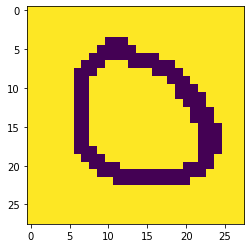

In [9]:
plt.imshow(img_grey)
plt.show()

In [10]:
img_grey = img_grey.reshape(-1,28,28,1)
img_grey = img_grey//255
y_preds = np.argmax(final_model.predict(img_grey),axis = 1)

In [11]:
print(y_preds)

[0]


i
